### Dataset:
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#Importing dataset
customer_df = pd.read_csv('Mall_Customers.csv')

In [30]:
#View the dataset
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [32]:
customer_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Data Understanding and Visualization

In [33]:
#Correlation between the features
customer_df.select_dtypes(include=['number']).corr() #leaving out columns with object data types

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


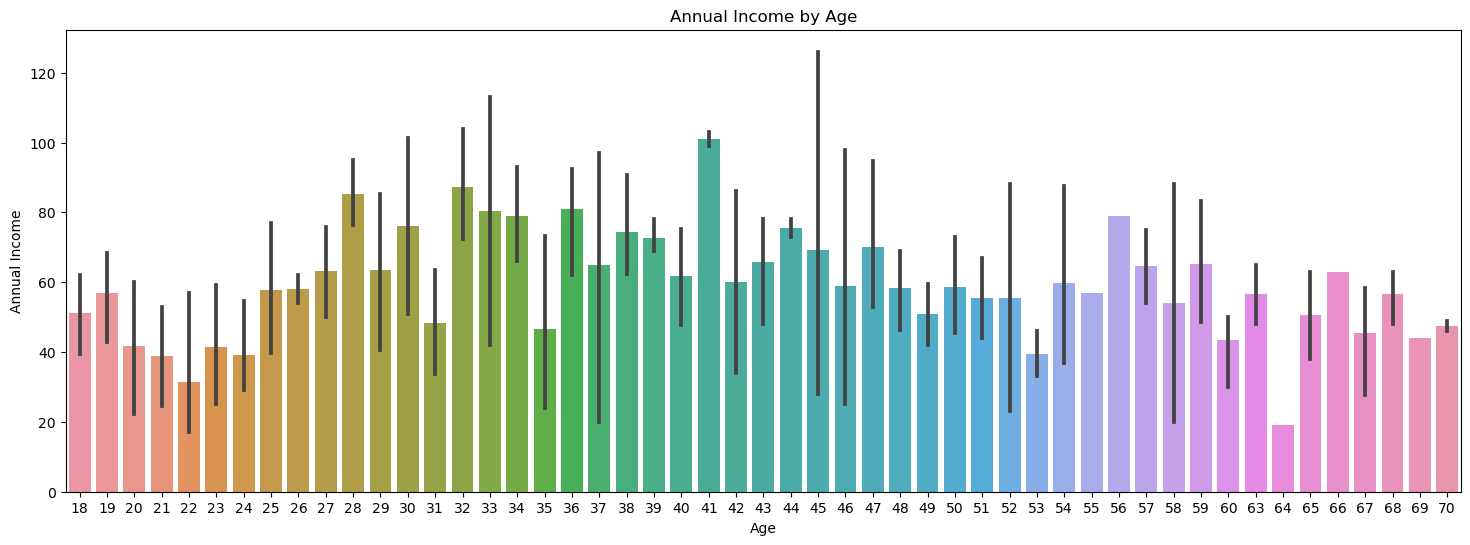

In [34]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Age', y='Annual Income (k$)', data=customer_df)
plt.title('Annual Income by Age')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

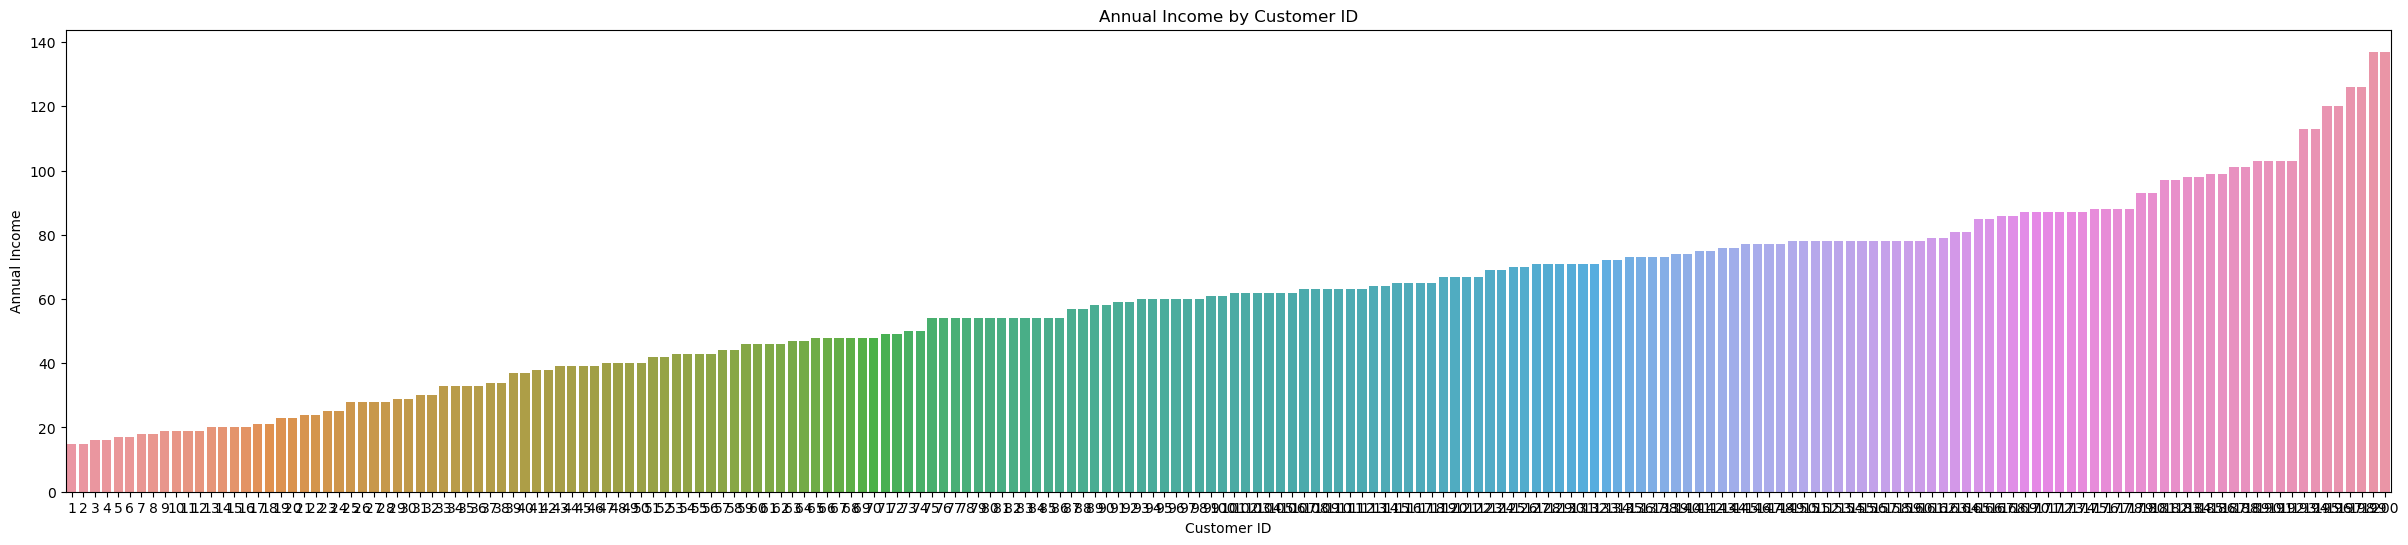

In [35]:
plt.figure(figsize=(30, 6))
sns.barplot(x='CustomerID', y='Annual Income (k$)', data=customer_df)
plt.title('Annual Income by Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Annual Income')
plt.show()

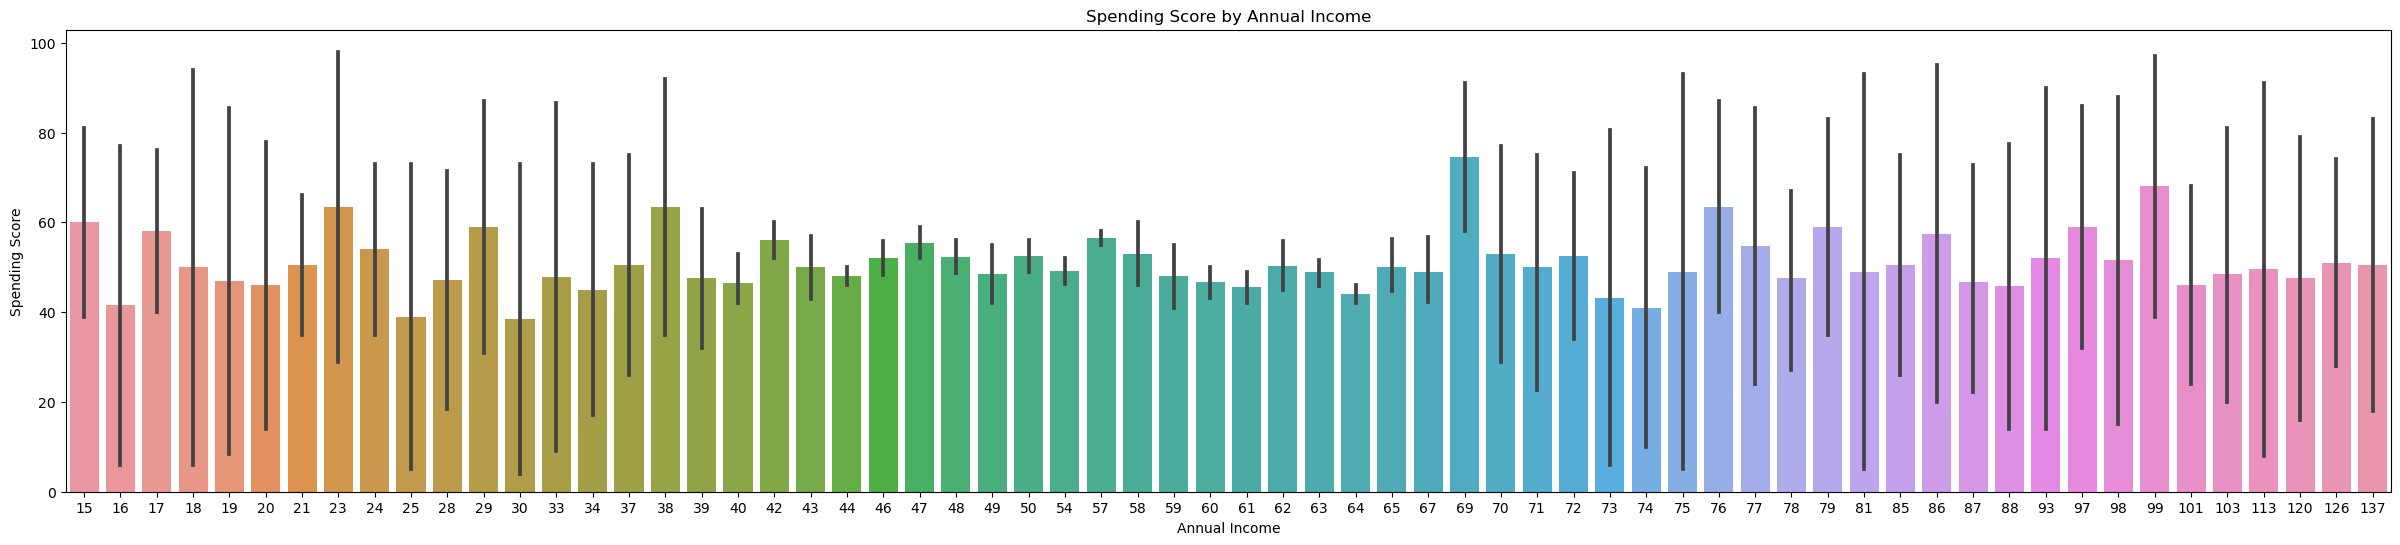

In [36]:
plt.figure(figsize=(30, 6))
sns.barplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_df)
plt.title('Spending Score by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Pre-Processing

In [37]:
#Checking for null values
customer_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* The data is mostly clean and good for modeling. However, I would like to change the column names of Annual Income and Spending Score to something simpler.

In [38]:
#Before renaming:
customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [39]:
#Renaming
customer_df = customer_df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)' : 'Spending Score'})

In [40]:
#After renaming:
customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

### K-Means Clustering

In [41]:
# importing k-means clustering algorithm
from sklearn.cluster import KMeans

In [42]:
X = customer_df[['Age', 'Annual Income', 'Spending Score']]

In [43]:
#Calculate and store the square root of inertia values for different numbers of clusters using KMeans clustering.
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

/Users/dishaapremnath/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dishaapremnath/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dishaapremnath/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dishaapremnath/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

Text(0, 0.5, 'Variance')

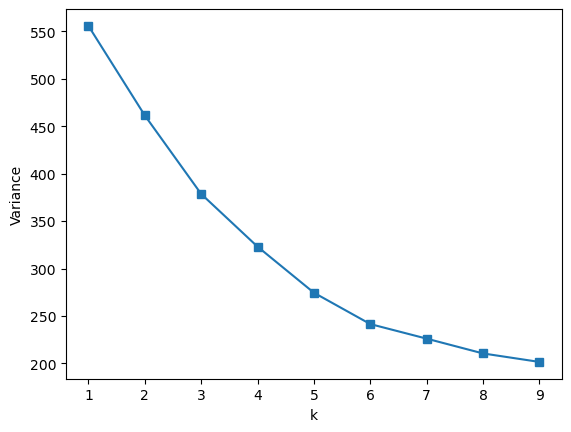

In [44]:
plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('k')
plt.ylabel('Variance')

**Two clusters are optimal, as this is where the slope slightly decreases**

In [45]:
#Creating the model
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

/Users/dishaapremnath/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
y = kmeans.fit_predict(X)

/Users/dishaapremnath/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Annual Income', ylabel='Spending Score'>

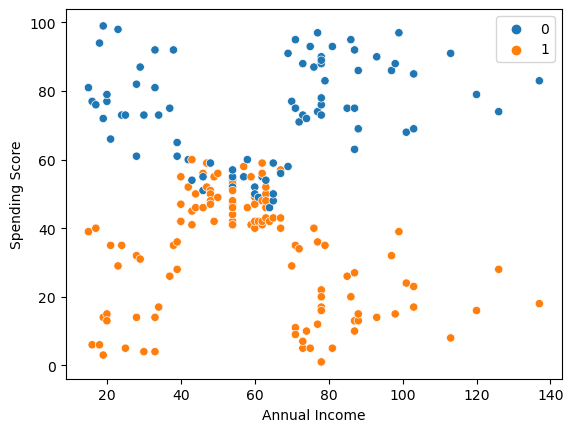

In [47]:
sns.scatterplot(x = customer_df['Annual Income'], y = customer_df['Spending Score'], hue=y)

<Axes: xlabel='Age', ylabel='Spending Score'>

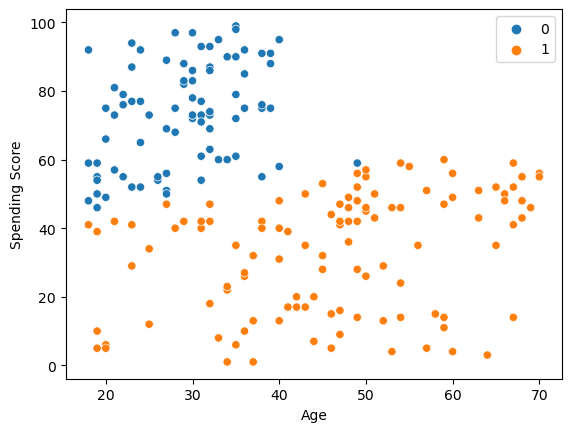

In [48]:
sns.scatterplot(x = customer_df['Age'], y = customer_df['Spending Score'], hue=y)

<Axes: xlabel='Age', ylabel='Annual Income'>

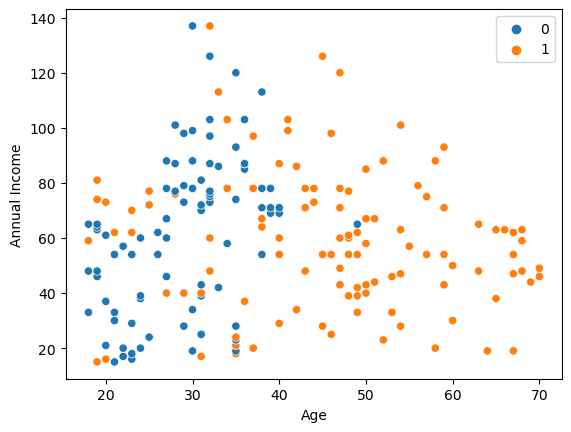

In [49]:
sns.scatterplot(x = customer_df['Age'], y = customer_df['Annual Income'], hue=y)

### Agglomerative Clustering

In [50]:
from sklearn.cluster import AgglomerativeClustering

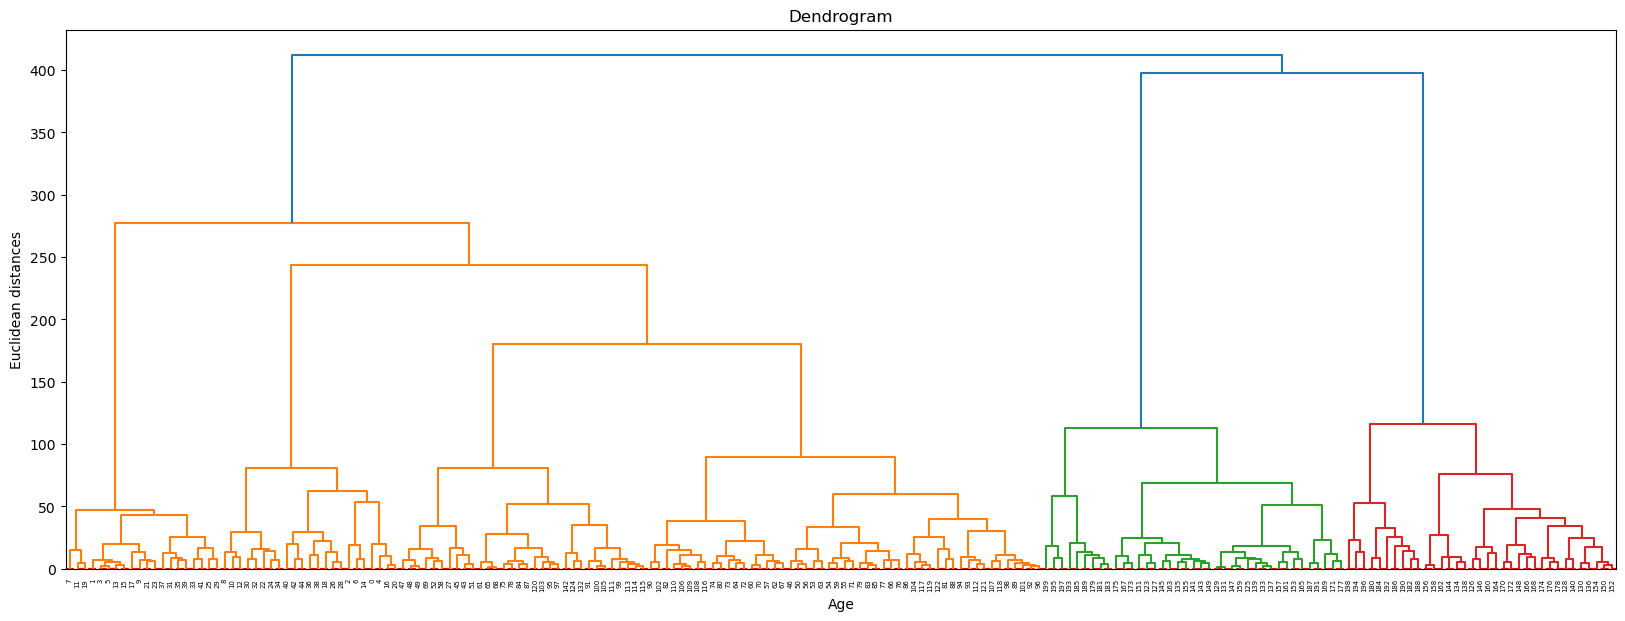

In [51]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))  
plt.title('Dendrogram')
plt.xlabel('Age')
plt.ylabel('Euclidean distances')
plt.axhline(color='r', linestyle='--')
plt.axhline(color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [52]:
optimal_number = 3

# Implement model
agglo = AgglomerativeClustering(n_clusters= optimal_number, metric='euclidean', linkage='ward')   

In [53]:
y_agglo = agglo.fit_predict(X)

<Axes: xlabel='Age', ylabel='Spending Score'>

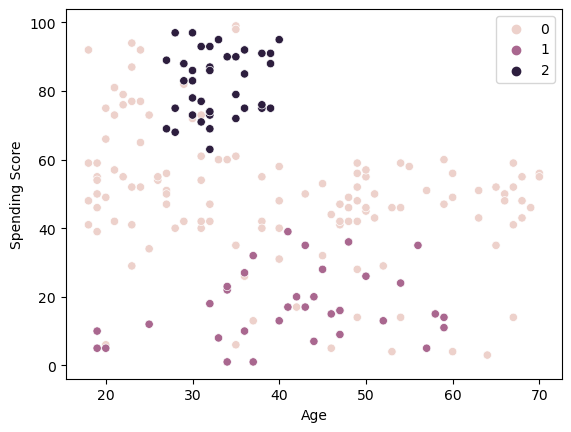

In [54]:
sns.scatterplot(x = customer_df['Age'], y = customer_df['Spending Score'], hue=y_agglo)

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

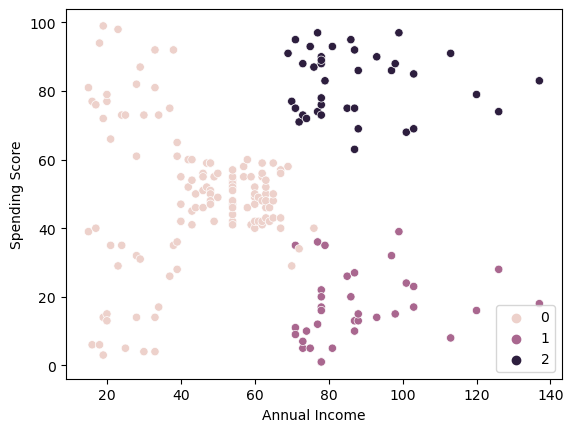

In [55]:
sns.scatterplot(x = customer_df['Annual Income'], y = customer_df['Spending Score'], hue=y_agglo)

<Axes: xlabel='Age', ylabel='Annual Income'>

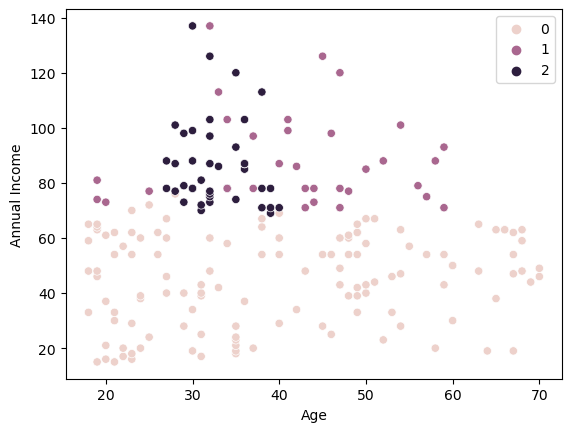

In [56]:
sns.scatterplot(x = customer_df['Age'], y = customer_df['Annual Income'], hue=y_agglo)